<a href="https://colab.research.google.com/github/santisantosh/e2e-app/blob/master/U3_MH1_CNN_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

[link text](https:// [link text](https:// [link text](https://)))To identify and classify images as cats or dogs

## Learning Objectives

At the end of the experiment, you will be able to :

* Load and prepare images for the model using Pytorch
* Develop a CNN model and improve model performance

In [10]:
#@title Mini-hackathon walkthrough
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/Pytorch_CNN_cats_and_dogs.mp4" type="video/mp4">
</video>
""")

## Dataset

The Dogs and Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat. The train folder contains ~22k images of dogs and cats. Each image in this folder has the label as part of the filename. The test folder contains ~2k images, named according to a numeric id.

## Grading = 10 Marks

## Setup Steps

In [12]:
#@title Run this cell to download the dataset

from IPython import get_ipython
ipython = get_ipython()

notebook="M2_Mini_Hackathon2_CNN_with_Pytorch" #name of the notebook
Answer = "This notebook is graded by mentors on the day of hackathon"
def setup():
#
   ipython.magic("sx wget http://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Cat_Dog_data_B17.zip")
   ipython.magic("sx unzip -qq Cat_Dog_data_B17.zip")
# ipython.magic("sx mv AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin?dl=1 AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin")
   print ("Setup completed successfully")
   return

setup()

Setup completed successfully


## Basic Pytorch packages

**torchvision:**  This package is used to load and prepare the dataset. Using this package we can perform/apply transformations on the input data.

**transforms:**  This package is  used to perform preprocessing on images and operations sequentially.

**nn:**  This package provides an easy and modular way to build and train simple or complex neural networks.

**optim:** This package is used for  implementing various optimization algorithms

In [13]:
# Import Libraries
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.autograd import Variable
from torch.utils.data import DataLoader

## **Stage 1:** Define Transformations and import data

### 1 Marks - > Compose multiple transformations with the following conditions

1. Transform image size to 128 by using Resize()

2. Convert image to Grayscale

3. Transform the image into a number using tensor

4. Normalize the tensor image with 0.5

[Hint](https://pytorch.org/vision/stable/transforms.html)

In [14]:
image_size = (128,128)

transformations = transforms.Compose([
    transforms.Resize(image_size),
    transforms.RandomHorizontalFlip(),    # Randomly flip the image horizontally
    transforms.RandomRotation(30),        # Randomly rotate the image by up to 30 degrees
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

### 1 Mark -> Load the dataset with the defined transformations

PyTorch includes a package called torchvision which is used to load and prepare the dataset. It includes two basic functions namely Dataset and DataLoader which helps in the transformation and loading of the dataset.

1. Dataset is used to read and transform a data point from the given dataset.  Note that, the data is not loaded on memory by now.

2. DataLoader is used to shuffle and batch the data. It can be used to load the data in parallel with multiprocessing workers. The Data loader reads the data and puts it into memory.



[Hint](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)

In [17]:
batch_size = 100

train_set = datasets.ImageFolder('/content/Cat_Dog_data/train', transform = transformations)

train_loader = DataLoader(
    dataset=train_set,            # The dataset to load
    batch_size=batch_size,        # Number of samples per batch
    shuffle=True,                 # Whether to shuffle the data at each epoch
    num_workers=4,                # Number of subprocesses to use for data loading (adjust based on your system)
    pin_memory=True               # If True, the data loader will copy tensors into CUDA pinned memory before returning them (useful for GPU training)
)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


### 1 Marks -> Plot the 5 images of Cats and 5 images of Dogs

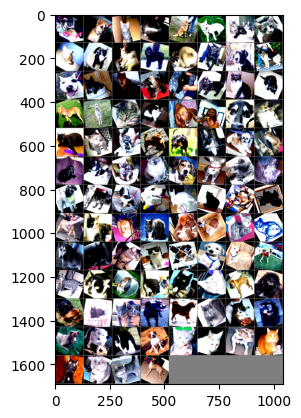

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
def imshow(img):
    """Function to display an image."""
    img = img / 2 + 0.5  # Unnormalize (assuming normalization was done with mean=0.5 and std=0.5)
    npimg = img.numpy()  # Convert to numpy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Transpose from (C, H, W) to (H, W, C)
    plt.show()

# Get a batch of training images
data_iter = iter(train_loader)  # Create an iterator from the DataLoader
images, labels = next(data_iter)  # Get the first batch of images and labels

# Display the images
imshow(torchvision.utils.make_grid(images))  # Make a grid of images for visualization

## **Stage2:** CNN Model

Neural Networks are inherited from the nn.Module class.

Define a neural network by using two functions \__init__ and forward function.

1. In the \__init__  function, perform a series of convolutions and pooling operations to detect the features. Apply a fully connected layer on top of these features. Apply LogSoftmax at the output layer to improve the performance.

2. The forward function is called on the Neural Network which takes the inputs and passes through the different layers that have been defined in the \__init__.  The output of both convolution and pooling layers is 3D whereas a fully connected layer expects a 1D vector of numbers. So flatten the output of the final pooling layer to a vector and that becomes the input to the fully connected layer.

[Hint](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_convolutional_neuralnetwork/)



### 3 Marks -> Create CNN Model


In [21]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Sample Convolution Layer 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2) # output size of the first convolutional layer is 16*128*128
        self.bn1 = nn.BatchNorm2d(16)
        self.relu1 = nn.ReLU()
        # Sample Maxpool for the Convolutional Layer 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=4, stride=4) # Maxpooling reduces the size by kernel size. After Maxpooling the output size is 16*32*32


        # YOUR CODE HERE for defining more number of Convolutional layers with Maxpool as required (Hint: Use at least 3 convolutional layers for better performance)

        # Convolutional Layer 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)  # output size: 32x32x32
        self.bn2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=4, stride=4)  # output size: 32x8x8

        # Convolutional Layer 3
        self.cnn3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2)  # output size: 64x8x8
        self.bn3 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)  # output size: 64x4x4

        # Fully Connected Layer
        self.fc1 = nn.Linear(in_features=64 * 4 * 4, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)  # Assuming 10 classes



    def forward(self, x):
        # Convolution Layer 1 and Maxpool
        out = self.cnn1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.maxpool1(out)

        # YOUR CODE HERE for the Convolutional Layers and Maxpool based on the defined Convolutional layers
        # Convolution Layer 2 and Maxpool
        out = self.cnn2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)

        # Convolution Layer 3 and Maxpool
        out = self.cnn3(out)
        out = self.bn3(out)
        out = self.relu3(out)
        out = self.maxpool3(out)

        # Flatten the output
        out = out.view(-1, 64 * 4 * 4)  # Flatten to 1D vector

        # Fully Connected Layer and LogSoftmax
        out = F.relu(self.fc1(out))
        out = self.fc2(out)
        out = F.log_softmax(out, dim=1)

        return out



        # YOUR CODE HERE for flattening the output of the final pooling layer to a vector. Flattening is simply arranging the 3D volume of numbers into a 1D vector




        # YOUR CODE HERE for returning the output of LogSoftmax after applying Fully Connected Layer



### 1 Mark -> Create an instance of the model and Declare the loss function and optimizer


In [22]:
# To run the training on GPU
print(torch.cuda.is_available())

device  =  torch.device("cuda" if torch.cuda.is_available() else "cpu")

True


In [24]:
import torch.optim as optim

# Assuming `device` has been defined as either 'cuda' or 'cpu'
# Initialize the model
model = CNNModel()
model = model.to(device)

print(model)

# Define the loss function
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification problems

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Using Adam optimizer with a learning rate of 0.001


CNNModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (cnn3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


## **Stage 3:** Train the Model and validate it continuously to calculate the loss and accuracy for the train dataset across each epoch.

### Expected training accuracy is above 90%

### 2 Marks -> Iterate over images in the train_loader and perform the following steps.

1. First, we zero out the gradients using zero_grad()

2. We pass the data to the model. Convert the data to GPU before passing data  to the model

3. We calculate the loss using a Loss function

4. Perform Backward pass using backward() to update the weights

5. Optimize and predict by using the torch.max()

6. Calculate the accuracy of the train dataset

[Hint](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_convolutional_neuralnetwork/)

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim

# Assuming that CNNModel, train_loader, and other required setups have already been defined

# Initialize the model, criterion, and optimizer
device = torch.device('cpu')  # Force training on CPU
model = CNNModel()
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10  # Set the number of epochs
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        # Step 1: Zero out the gradients
        optimizer.zero_grad()

        # Step 2: Move data to device (CPU) and pass it to the model
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)  # Forward pass

        # Step 3: Calculate the loss
        loss = criterion(outputs, labels)

        # Step 4: Perform backward pass to compute gradients
        loss.backward()

        # Step 5: Update weights using the optimizer
        optimizer.step()

        # Step 6: Predict and calculate accuracy
        _, predicted = torch.max(outputs.data, 1)  # Get the predicted class with the highest probability
        total += labels.size(0)  # Number of samples in the batch
        correct += (predicted == labels).sum().item()  # Number of correct predictions

        # Accumulate loss
        running_loss += loss.item() * images.size(0)  # Multiply by batch size

    # Calculate average loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = correct / total

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

print('Training complete')



RuntimeError: Given groups=1, weight of size [16, 1, 5, 5], expected input[100, 3, 128, 128] to have 1 channels, but got 3 channels instead

## **Stage 4:** Testing Evaluation for CNN model

### Expected performance of test evaluation is above 90%

### 1 Marks -> Evaluate model with the given test data

1. Transform and load the test images.

2. Pass the test data through the model (network) to get the outputs

3. Get the predictions from a maximum value using torch.max

4. Compare with the actual labels and get the count of the correct labels

5. Calculate the accuracy based on the count of correct labels

In [27]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the transformations for the test dataset
transformations = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to match the input size of the model
    transforms.ToTensor(),
    # Add normalization if used during training, e.g.:
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the test dataset
val_set = datasets.ImageFolder('/content/Cat_Dog_data/test', transform=transformations)

# Create DataLoader for the test dataset
batch_size = 100  # Adjust as needed
val_loader = DataLoader(dataset=val_set, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# Initialize the model (ensure it is the same as used during training)
device = torch.device('cpu')  # Change to 'cuda' if GPU is available and used
model = CNNModel()  # Ensure CNNModel is defined and matches the trained model
model = model.to(device)

# Load the trained model weights (if saved)
# model.load_state_dict(torch.load('model_weights.pth'))  # Uncomment if you saved the model weights

# Evaluate the model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation for inference
    for images, labels in val_loader:
        # Move data to device (CPU in this case)
        images, labels = images.to(device), labels.to(device)

        # Forward pass through the model
        outputs = model(images)

        # Get predictions from the model outputs
        _, predicted = torch.max(outputs.data, 1)

        # Count total and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')

RuntimeError: Given groups=1, weight of size [16, 1, 5, 5], expected input[100, 3, 128, 128] to have 1 channels, but got 3 channels instead

In [ ]:
model.eval()
# YOUR CODE HERE for calculating the accuracy